In [150]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

#np.set_printoptions(threshold=np.inf)


In [184]:
# Function to read edges from a file
def read_edges_from_file(filename):
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            nodes = line.strip().split()
            edges.append((int(nodes[0]), int(nodes[1])))
    return edges

# Function to read features from a file
def read_features_from_file(filename):
    features = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            node = int(parts[0])  # First number is the node ID
            feature_vector = np.array(list(map(int, parts[1:])))  # Rest are features
            features[node] = feature_vector
    return features

# Gaussian kernel similarity
def gaussian_similarity(x, y, sigma=1.0):
    diff = x - y
    distance = np.dot(diff, diff)  # Squared Euclidean distance
    return np.exp(-distance / (2 * sigma ** 2))

# Create weighted adjacency matrix with Gaussian kernel weights
def create_weighted_adjacency_matrix(edges, features, node_mapping, sigma=1.0):
    size = len(node_mapping)
    A = np.zeros((size, size), dtype=float)
    for u, v in edges:
            u_idx, v_idx = node_mapping[u], node_mapping[v]
            weight = gaussian_similarity(features[u], features[v], sigma)
            A[u_idx, v_idx] = weight
            A[v_idx, u_idx] = weight  # For undirected graph
    return A

# Create degree matrix based on the number of non-zero values in each row
def create_degree_matrix(adjacency_matrix):
    degrees = np.count_nonzero(adjacency_matrix, axis=1)  # Count non-zero entries in each row
    D = np.diag(degrees)  # Create diagonal degree matrix
    return D

# Create Laplacian matrix
def create_laplacian_matrix(A, D):
    return D - A

# Compute eigenvalues and eigenvectors and sort them in increasing order based on eigen values
def analyze_laplacian(L):
    eigenvalues, eigenvectors = eigh(L)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

### Reading features and edges from the files

In [185]:
import os
# Main execution
central_node = 0

current_working_directory = os.getcwd()
edges_path = os.path.join(current_working_directory, "dataset", f"{central_node}.edges")
features_path = os.path.join(current_working_directory, "dataset", f"{central_node}.feat")

# Read edges and features
edges = read_edges_from_file(edges_path)
features = read_features_from_file(features_path)

In [186]:
# Map original node IDs to contiguous indices
unique_nodes = list(features.keys())
node_mapping = {node: idx for idx, node in enumerate(unique_nodes)}

# Print information
no_nodes = len(unique_nodes)
print(f"Number of nodes: {no_nodes}")
print(f"Number of features per node: {len(next(iter(features.values())))}")

Number of nodes: 347
Number of features per node: 224


In [187]:
print(node_mapping)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120, 122: 12

In [188]:
print(f"First 5 edges: {edges[:5]}")
print(f"First 5 features of first node: {features[unique_nodes[0]][:5]}")

First 5 edges: [(236, 186), (122, 285), (24, 346), (271, 304), (176, 9)]
First 5 features of first node: [0 0 0 0 0]


In [195]:
# Create weighted adjacency matrix
A = create_weighted_adjacency_matrix(edges, features, node_mapping, sigma=1.0)

# Create degree and Laplacian matrices
D = create_degree_matrix(A)
L = create_laplacian_matrix(A, D)

print(f"Size of Laplacian matrix: {len(L)} x {len(L[0])}")
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = analyze_laplacian(L)


# Example output
print("Eigenvalues:", eigenvalues[:10])  # Print the first few eigenvalues

Size of Laplacian matrix: 347 x 347
Eigenvalues: [-1.58050984e-14 -9.77085884e-15 -5.69290752e-15 -3.73087678e-15
 -2.10381288e-15 -4.54821247e-16  1.30315498e-16  3.38977229e-16
  4.27783260e-16  4.49345217e-16]


Largest Eigen Gap: 5.7785348983409435
Index of Largest Gap: 329


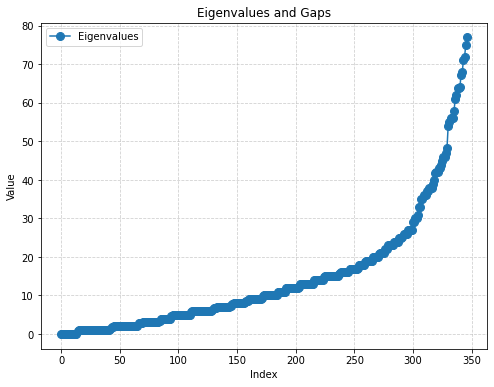

In [198]:
# Step 2: Compute the gaps between consecutive eigenvalues
eigen_gaps = np.diff(eigenvalues)

# Step 3: Find the largest eigen gap and its position
largest_gap = np.max(eigen_gaps)
gap_index = np.argmax(eigen_gaps)

#print("Sorted Eigenvalues:", sorted_eigenvalues)
#print("Eigen Gaps:", eigen_gaps)
print("Largest Eigen Gap:", largest_gap)
print("Index of Largest Gap:", gap_index)

# Plot the eigenvalues and the gaps
plt.figure(figsize=(8, 6))

# Plot eigenvalues as points
plt.plot(eigenvalues, 'o-', label="Eigenvalues", markersize=8)

# Annotate gaps
for i in range(len(eigen_gaps)):
    x_pos = i + 0.5  # Position between two eigenvalues
    y_pos = (eigenvalues[i] + eigenvalues[i + 1]) / 2  # Midpoint for the text
plt.annotate(f"{largest_gap:.2f}", xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 0.1), ha="center", color="red")

# Enhance plot
plt.title("Eigenvalues and Gaps")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()



In [123]:
# Select the eigenvectors corresponding to the smallest k eigenvalues
k = 2
selected_eigenvectors = eigenvectors[:, :k]

In [124]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(selected_eigenvectors)
labels = kmeans.labels_

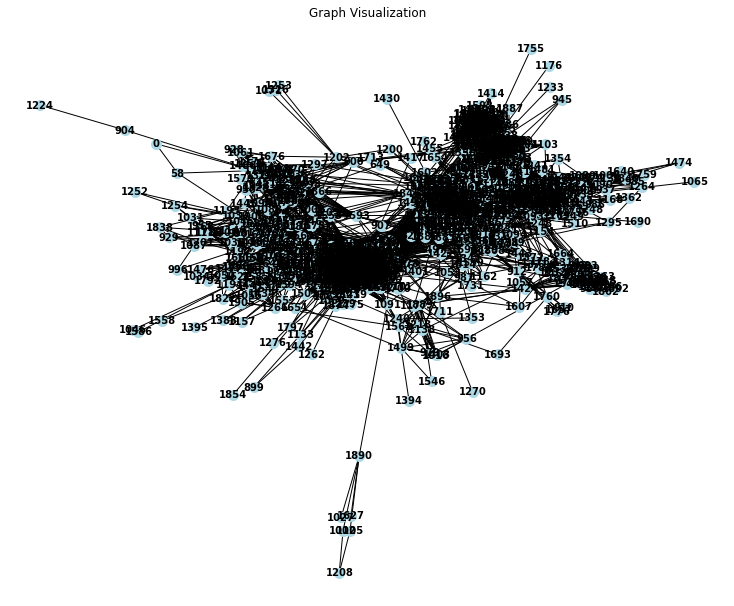

Number of eigenvalues: 1045
Number of eigenvectors: 1045


In [90]:
# Visualization
G = nx.Graph()
G.add_edges_from(edges)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

# Print eigenvalues and eigenvector dimensions
print("Number of eigenvalues:", len(eigenvalues))
print("Number of eigenvectors:", len(eigenvectors))